In [3]:
from model import *
from data import *

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [ ]:
data_gen_args = dict(rotation_range=0.4,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'../','data','anno',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane_2.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=10,epochs=20,callbacks=[model_checkpoint])

/notebooks/OilStoneJuncBud/unet/model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
/usr/local/lib/python3.5/dist-packages/keras/legacy/layers.py:464: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/notebooks/OilStoneJuncBud/unet/model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
/notebooks/OilStoneJuncBud/unet/model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge8 = merge

Epoch 1/20
Found 117 images belonging to 1 classes.
Found 117 images belonging to 1 classes.
 9/10 [==========================>...] - ETA: 0s - loss: 0.7022 - acc: 0.6588
Epoch 00001: loss improved from inf to 0.70127, saving model to unet_membrane_2.hdf5


### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [1]:
cv2

NameError: name 'cv2' is not defined

In [ ]:
model.predict()

In [4]:
! mkdir ../predictions

In [ ]:
testGene = testGenerator("../data")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("../predictions", results)

/notebooks/OilStoneJuncBud/unet/model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
/usr/local/lib/python3.5/dist-packages/keras/legacy/layers.py:464: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/notebooks/OilStoneJuncBud/unet/model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
/notebooks/OilStoneJuncBud/unet/model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge8 = merge

In [8]:
import pydicom
import os
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np
import cv2

%matplotlib inline

In [20]:
results[0]

array([[[0.7204477 ],
        [0.72126067],
        [0.72126067],
        ...,
        [0.72126067],
        [0.72126067],
        [0.72126067]],

       [[0.72126067],
        [0.72126067],
        [0.72126067],
        ...,
        [0.72126067],
        [0.72126067],
        [0.72126067]],

       [[0.72126067],
        [0.72126067],
        [0.72126067],
        ...,
        [0.72126067],
        [0.72126067],
        [0.72126067]],

       ...,

       [[0.72126067],
        [0.72126067],
        [0.72126067],
        ...,
        [0.72126067],
        [0.72126067],
        [0.72126067]],

       [[0.72126067],
        [0.72126067],
        [0.72126067],
        ...,
        [0.72126067],
        [0.72126067],
        [0.72126067]],

       [[0.72126067],
        [0.72126067],
        [0.72126067],
        ...,
        [0.72126067],
        [0.72126067],
        [0.72126067]]], dtype=float32)

TypeError: Invalid dimensions for image data

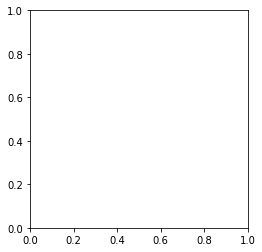

In [16]:
plt.imshow(results[0])